# Task 3 - Music Recommention System

In [1]:
# Importing libraries:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tracks = pd.read_csv("music_raw_data.csv")
print(tracks.columns)
tracks.head()

Index(['pos', 'artist_name', 'track_uri', 'artist_uri', 'track_name',
       'album_uri', 'duration_ms_x', 'album_name', 'name', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms_y', 'time_signature',
       'artist_pop', 'genres', 'track_pop'],
      dtype='object')


,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,name,danceability,...,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop
0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Throwbacks,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,73,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,w o r k o u t,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
2,14,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,party playlist,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
3,42,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Dance mix,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
4,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,spin,0.904,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69


In [3]:
# To show the duplicate values:
tracks[['artist_name','track_name','name']]

,artist_name,track_name,name
0,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),Throwbacks
1,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),w o r k o u t
2,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),party playlist
3,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),Dance mix
4,Missy Elliott,Lose Control (feat. Ciara & Fat Man Scoop),spin
...,...,...,...
67494,Jon D,I Don't Know,thinking of you
67495,Big Words,The Answer,thinking of you
67496,Allan Rayman,25.22,thinking of you
67497,Jon Jason,Good Feeling,thinking of you


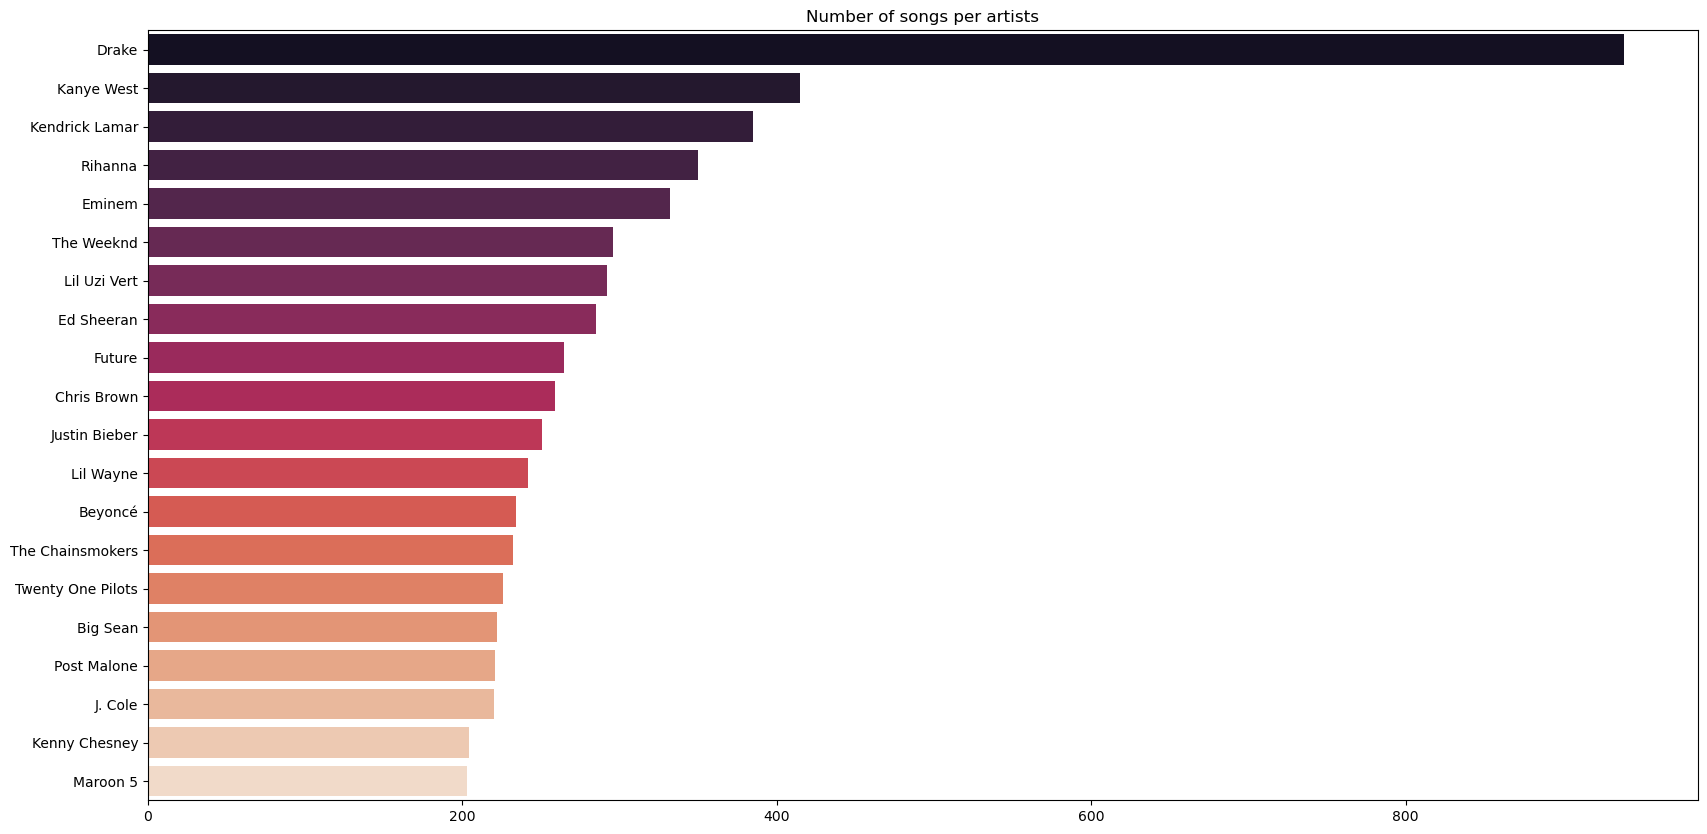

In [4]:
plt.figure(figsize=(20,10))
sns.barplot(x=tracks['artist_name'].value_counts()[:20].values,
            y=tracks['artist_name'].value_counts()[:20].index,
            palette="rocket")
plt.title("Number of songs per artists")
plt.show()

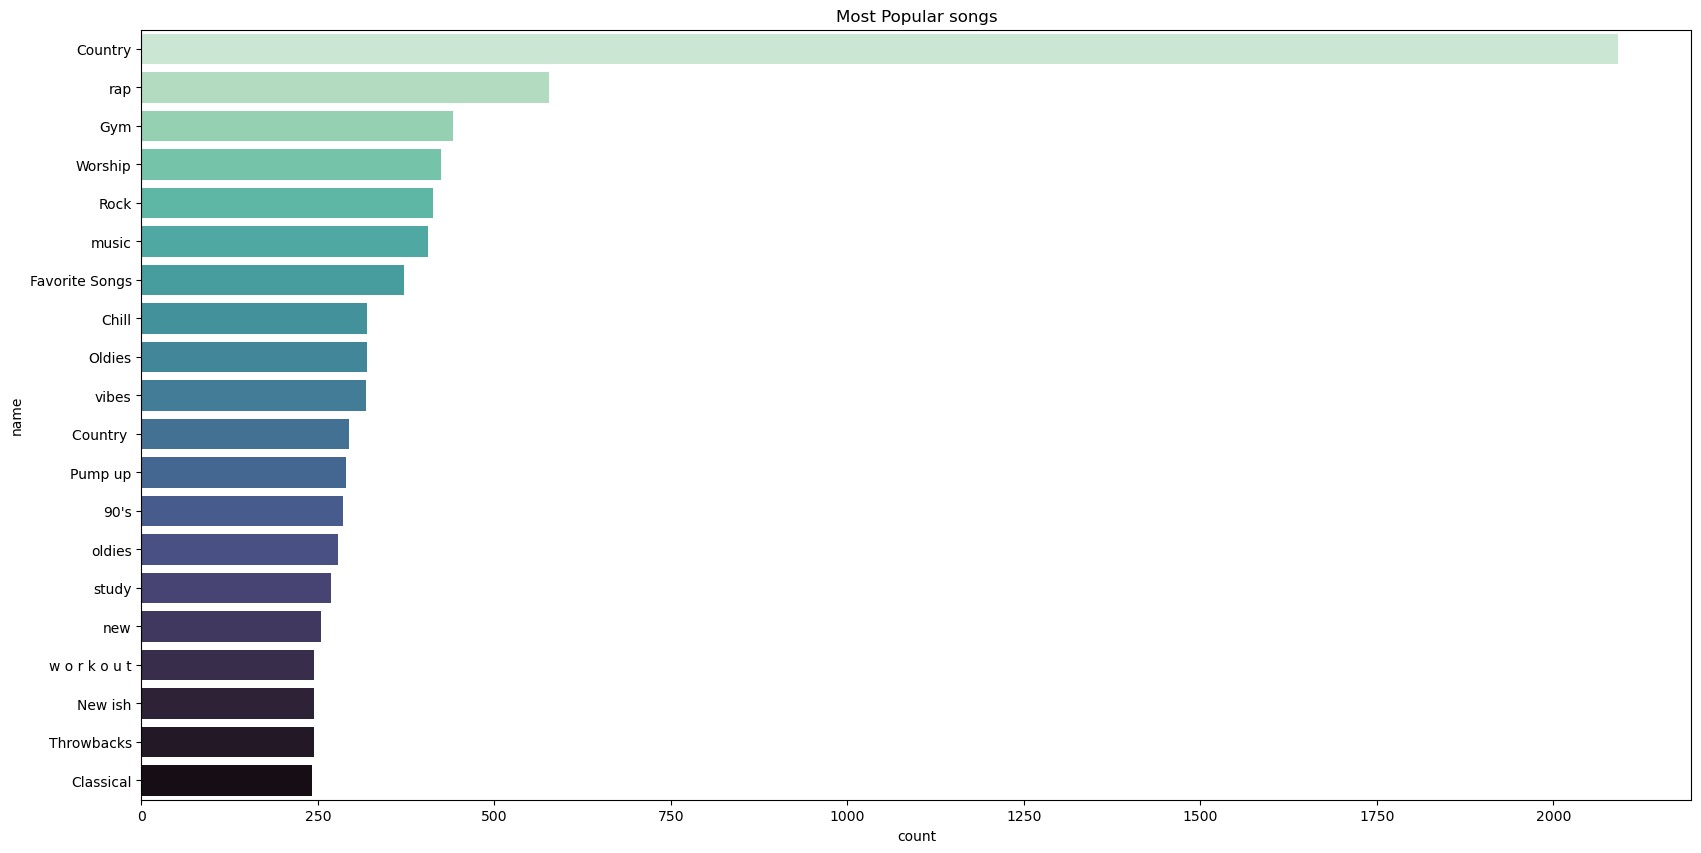

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(y="name",data=tracks, palette="mako_r",
              order=tracks.name.value_counts().iloc[:20].index)
plt.title("Most Popular songs")
plt.show()

In [15]:
# Removing song duplicacy:
def remove_duplicacy(df):
   
    df['artists_song'] = df.apply(lambda row: row['artist_name']+row['track_name'],axis = 1)
    return df.drop_duplicates('artists_song')

songDF = remove_duplicacy(tracks)
print("Are all songs unique: ",len(pd.unique(songDF.artists_song))==len(songDF))

Are all songs unique:  True


In [16]:
# Considering only useful columns
def useful_col(df):
      
       return df[['artist_name','id','track_name','danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', "artist_pop", "genres", "track_pop"]]
songDF = useful_col(songDF)
songDF.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
6,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83
19,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25
46,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79
55,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2


In [17]:
def genre_data_process(df):
   
    df['genres_list'] = df['genres'].apply(lambda x: x.split(" "))
    return df
songDF = genre_data_process(songDF)
songDF['genres_list'].head()

0     [dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...
6                       [dance_pop, pop, post-teen_pop]
19                                [dance_pop, pop, r&b]
46                                     [dance_pop, pop]
55                             [pop_rap, reggae_fusion]
Name: genres_list, dtype: object

In [18]:
def track_data_process(df):
    
    df = remove_duplicacy(df)
    df = useful_col(df)
    df = genre_data_process(df)

    return df

In [19]:
def getSubjectivity(text):
  
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  
  return TextBlob(text).sentiment.polarity

def getAnalysis(score, task="polarity"):
  
  if task == "subjectivity":
    if score < 1/3:
      return "low"
    elif score > 1/3:
      return "high"
    else:
      return "medium"
  else:
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

def sentiment_analysis(df, text_col):
 
  df['subjectivity'] = df[text_col].apply(getSubjectivity).apply(lambda x: getAnalysis(x,"subjectivity"))
  df['polarity'] = df[text_col].apply(getPolarity).apply(getAnalysis)
  return df

In [20]:
# Showing result
result = sentiment_analysis(songDF, "track_name")
result.head()

,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69,"[dance_pop, hip_hop, hip_pop, pop, pop_rap, r&...",low,Neutral
6,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,Toxic,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,84,dance_pop pop post-teen_pop,83,"[dance_pop, pop, post-teen_pop]",low,Neutral
19,Beyoncé,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259,86,dance_pop pop r&b,25,"[dance_pop, pop, r&b]",high,Negative
46,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,0.892,0.714,4,-6.055,0,0.1410,0.20100,0.000234,0.0521,0.817,100.972,82,dance_pop pop,79,"[dance_pop, pop]",low,Neutral
55,Shaggy,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759,75,pop_rap reggae_fusion,2,"[pop_rap, reggae_fusion]",low,Neutral


In [21]:
def abc_pre(df, column, new_name): 
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

In [22]:
# One-hot encoding for the subjectivity 
matter_abc = abc_pre(result, 'subjectivity','subject')
matter_abc.iloc[0]

subject|high      0
subject|low       1
subject|medium    0
Name: 0, dtype: uint8

In [23]:
# TF-IDF implementation
tfidf = TfidfVectorizer()
tfidf_matrix =  tfidf.fit_transform(songDF['genres_list'].apply(lambda x: " ".join(x)))
genre_df = pd.DataFrame(tfidf_matrix.toarray())
genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
genre_df.drop(columns='genre|unknown')
genre_df.reset_index(drop = True, inplace=True)
genre_df.iloc[0]

genre|21st_century_classical    0.0
genre|432hz                     0.0
genre|_hip_hop                  0.0
genre|_roll                     0.0
genre|a_cappella                0.0
                               ... 
genre|zambian_hip_hop           0.0
genre|zhongguo_feng             0.0
genre|zolo                      0.0
genre|zouk                      0.0
genre|zouk_riddim               0.0
Name: 0, Length: 2147, dtype: float64

In [24]:
# artist_pop distribution descriptive statistics
print(songDF['artist_pop'].describe())

count    34247.000000
mean        61.916606
std         19.120147
min          0.000000
25%         51.000000
50%         65.000000
75%         76.000000
max        100.000000
Name: artist_pop, dtype: float64


In [26]:
pop = songDF[["artist_pop"]].reset_index(drop = True)
scaler = MinMaxScaler()
pop_column = pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns)
pop_column.head()

,artist_pop
0,0.74
1,0.84
2,0.86
3,0.82
4,0.75


In [29]:
def create_set(df, float_cols):
        
    # Tfidf genre lists
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['genres_list'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    genre_df.drop(columns='genre|unknown') 
    genre_df.reset_index(drop = True, inplace=True)
    
    # Sentiment analysis
    raw = sentiment_analysis(df, "track_name")

    # One-hot Encoding
    matter_abc = abc_pre(raw, 'subjectivity','subject') * 0.3
    polar_abc = abc_pre(raw, 'polarity','polar') * 0.5
    key_abc = abc_pre(raw, 'key','key') * 0.5
    mode_abc = abc_pre(raw, 'mode','mode') * 0.5
  
    # Scale popularity columns
    pop = raw[["artist_pop","track_pop"]].reset_index(drop = True)
    scaler = MinMaxScaler()
    pop_column= pd.DataFrame(scaler.fit_transform(pop), columns = pop.columns) * 0.2 

    # Scale audio columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    # Concanenate all features
    final_result = pd.concat([genre_df, floats_scaled, pop_scaled, matter_abc, polar_abc, key_abc, mode_abc], axis = 1)
    
    # Add song id
    final_result['id']=raw['id'].values
    
    return final_result

In [37]:
# Save the data and generate the features
float_cols = songDF.dtypes[songDF.dtypes == 'float64'].index.values
songDF.to_csv("all_data.csv", index = False)

# Generate features
complete_set = create_set(songDF, float_cols=float_cols)
complete_set.to_csv("complete_data.csv", index = False)
complete_set.head()

,genre|21st_century_classical,genre|432hz,genre|_hip_hop,genre|_roll,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|accordion,genre|acid_jazz,genre|acid_rock,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0UaMYEvWZi0ZqiDOoHU3YI
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6I9VzXrHxO9rA9A5euc8Ak
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0WqIKmW4BTrj3eJFmnCKMv
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1AWQoqb9bSvzTjaLralEkT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1lzr43nnXAijIGYnCT8M8H


In [38]:
# Test playlist:  Mom's playlist
tracks_test = tracks[tracks['name']=="Mom's playlist"]
tracks_test.head()
tracks_test.to_csv("test_track.csv")

In [39]:
def generate_track(complete_set, playlist_df):
    
    complete_set_track = complete_set[complete_set['id'].isin(playlist_df['id'].values)]
    complete_set_nontrack = complete_set[~complete_set['id'].isin(playlist_df['id'].values)]
    complete_set_track_final = complete_set_track.drop(columns = "id")
    return complete_set_track_final.sum(axis = 0), complete_set_nontrack


In [42]:
# Generate the features
complete_set_track_vector, complete_set_nontrack = generate_track(complete_set, tracks_test)

In [43]:
# Non-track features
complete_set_nontrack.head()

,genre|21st_century_classical,genre|432hz,genre|_hip_hop,genre|_roll,genre|a_cappella,genre|abstract_beats,genre|abstract_hip_hop,genre|accordion,genre|acid_jazz,genre|acid_rock,...,key|5,key|6,key|7,key|8,key|9,key|10,key|11,mode|0,mode|1,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0UaMYEvWZi0ZqiDOoHU3YI
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,6I9VzXrHxO9rA9A5euc8Ak
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0WqIKmW4BTrj3eJFmnCKMv
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1AWQoqb9bSvzTjaLralEkT
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1lzr43nnXAijIGYnCT8M8H


In [44]:
# Summarized track features
complete_set_track_vector

genre|21st_century_classical     0.0
genre|432hz                      0.0
genre|_hip_hop                   0.0
genre|_roll                      0.0
genre|a_cappella                 0.0
                                ... 
key|9                            3.5
key|10                           2.5
key|11                           3.0
mode|0                           9.0
mode|1                          30.0
Length: 2177, dtype: float64

In [45]:
def generate_track_recos(df, features, nonplaylist_features):
    
    non_track_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    
    non_track_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_track_df_top_60 = non_track_df.sort_values('sim',ascending = False).head(60)
    
    return non_track_df_top_60

In [49]:
# Genreate top 15 recommendation
recommend = generate_track_recos(songDF, complete_set_track_vector, complete_set_nontrack)
recommend.head(15)

C:\Users\PRATIKSHA\AppData\Local\Temp\ipykernel_2280\1290158397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_track_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]


,artist_name,id,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,artist_pop,genres,track_pop,genres_list,subjectivity,polarity,sim
43254,The 1975,51cd3bzVmLAjlnsSZn4ecW,She's American,0.647,0.857,1,-3.940,1,0.0547,0.16700,...,0.0763,0.550,115.976,78,modern_alternative_rock modern_rock pop rock,55,"[modern_alternative_rock, modern_rock, pop, rock]",low,Neutral,0.821713
28834,American Authors,64ybTt8CKxPdeXBNnu08Op,Believer,0.583,0.968,1,-2.909,1,0.0368,0.00141,...,0.1300,0.910,119.999,70,indie_poptimism modern_alternative_rock modern...,55,"[indie_poptimism, modern_alternative_rock, mod...",low,Neutral,0.817135
24013,Imagine Dragons,4IWAyPf1KMq7JCyGeCjTeH,Whatever It Takes,0.675,0.649,1,-4.953,1,0.0315,0.04290,...,0.1280,0.537,134.955,91,modern_rock rock,0,"[modern_rock, rock]",low,Neutral,0.817039
51128,American Authors,1obisQNOcikRvTdStbW3pG,Go Big Or Go Home,0.665,0.875,1,-4.272,1,0.0426,0.00939,...,0.0897,0.660,122.008,70,indie_poptimism modern_alternative_rock modern...,63,"[indie_poptimism, modern_alternative_rock, mod...",low,Neutral,0.815962
53025,Bruno Mars,1KtU0WCq472KzqCXgMOxkS,That's What I Like - Alan Walker Remix,0.692,0.896,1,-4.017,1,0.0502,0.01210,...,0.1990,0.798,134.056,92,dance_pop pop,62,"[dance_pop, pop]",low,Neutral,0.814093
45212,Imagine Dragons,2gSWEq3T6lfgxXjkb1s0QU,The River,0.391,0.667,1,-5.768,1,0.0317,0.00922,...,0.3140,0.269,170.039,91,modern_rock rock,0,"[modern_rock, rock]",low,Neutral,0.813637
61128,The Neighbourhood,4TaY35s44Bf6OQnRK4R8Y5,West Coast,0.742,0.468,1,-6.356,1,0.1080,0.16200,...,0.3370,0.456,78.047,86,modern_alternative_rock modern_rock pop,59,"[modern_alternative_rock, modern_rock, pop]",low,Neutral,0.813497
43408,The 1975,1v07ywlVYd02pOCnXRBDNA,Menswear,0.708,0.539,1,-10.281,1,0.0681,0.54100,...,0.0856,0.159,97.015,78,modern_alternative_rock modern_rock pop rock,51,"[modern_alternative_rock, modern_rock, pop, rock]",low,Neutral,0.813248
46368,Bruno Mars,1BEMASUZQDqN5UGxMb1m6A,That's What I Like (feat. Gucci Mane) - Remix,0.854,0.564,1,-4.964,1,0.0485,0.01710,...,0.0849,0.899,134.071,92,dance_pop pop,60,"[dance_pop, pop]",low,Neutral,0.811781
17656,Bruno Mars,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,0.853,0.560,1,-4.961,1,0.0406,0.01300,...,0.0944,0.860,134.066,92,dance_pop pop,84,"[dance_pop, pop]",low,Neutral,0.811633


In [48]:
tracks_test[["artist_name","track_name"]][:20]

,artist_name,track_name
413,The Killers,Mr. Brightside
1234,Rihanna,We Found Love
1363,American Authors,Best Day Of My Life
1579,Clean Bandit,Rather Be (feat. Jess Glynne)
1732,Sia,Chandelier
3986,Hozier,Jackie And Wilson
3999,Aloe Blacc,I Need a Dollar
4002,Aloe Blacc,Wake Me Up - Acoustic
4007,John Legend,All of Me
4027,Pharrell Williams,"Happy - From ""Despicable Me 2"""
